## Twitter Analysis of gun control sentiments in Chicago


I will be using twitter to better understand sentiments involving gun contol in the Chicago area

By Ainsleigh Douglas

First we will bring in all the libraries that will allow us to process and plot geo spatial data

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import osmnx as ox
import matplotlib.pyplot as plt

/opt/conda/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


Tweepy is the library to bring in twitter data using python, this library needs authentication such as a twitter develoepr account.

In [2]:
import tweepy as tw

Textblob is a library for text analysis, used for cleaning up tweets and sentiment analysis

In [3]:
from textblob import TextBlob
import re

This library called wordcloud will allow us to create word clouds

In [4]:
from wordcloud import WordCloud, STOPWORDS

Now we will upload our personal twitter keys inorder to access the API provided by twitter

In [5]:
consumer_key= 'IdnKva5I3b3dwLngiiwZPvfZV'
consumer_secret= 'I0kfwHZnesGOnm5x41ADgqqrFhlR4qPlcadVPDfzgM1LVzCg6h'
access_token= '1362449105348304900-dWgBoUlT0XfdnuQ0SWdfYTNGmlFfsi'
access_token_secret= '7mnMhZDffYkVswKMzdxdSSPqxX8wusNDYAlOOdNUPTxbA'

Next I will authenticate myself

In [6]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

### Defining my search criteria

Now I will specific my research and clean the tweets I find accordingly. The search term I will use is "gun control" inorder to understand the overall twitter sentiments related to gun restrictions in the city of Chicago.

In [7]:
searchterm = 'gun control'

Now I will filter out the retweets and cap the number of tweets at 500 because there is a limit to how many tweets you can process at a time.

In [8]:
q = searchterm + " -filter:retweets"
max_tweets = 500

Next I will run a query for full length tweets that will max at 500 based on my key phrase "gun control"

In [9]:
tweets = tw.Cursor(api.search,
                   q=q, 
                   tweet_mode='extended').items(max_tweets)

Now I will run a loop to print 500 tweets referencing my search phrase.

In [10]:
for index, tweet in enumerate(tweets):
    print(index, tweet.full_text)

0 @SpringfieldOG @AriBerman I hear you about mental health and gun control, seriously I am there too.  However, on the other hand, I would be far more strongly on the side of gun control if there were national laws allowing for physician-assisted suicide. Sometimes a person truly needs a legit exit strategy
1 @evanbooth @sobbywomack @Daniell28008727 @TheOnion Is that really the issue?  The argument I am responding to is that gun control doesn't work and leads to MORE CRIME.  

If you can show that homicides increase after gun control is enacted, then please proceed.
2 It was stated a few months ago by some that Asians were gonna be the next up on the racism Olympics circuit since Biden got in. Those in power are attempting to push a "false" narrative just in time to push for more gun control by using said narrative. Convenient timing? 🤔 https://t.co/tyH0jiqcpP
3 My goodness this is a very chaotic mess presidency.  Distractions???  From HR 1?  Gun control????
4 I had a really bad day a 

Now I will refine my collection even further to a geo location and my defined phrase. In this case I will use the longitude and lattitude of the center of downtown Chicago and include everything within 50 km.

In [11]:
tweets = tw.Cursor(api.search,
                   q=q,
                   geocode='41.789722,-87.599724,50km', 
                   tweet_mode='extended').items(max_tweets)

Once again I will run the loop to print the results of the query

In [12]:
for index, tweet in enumerate(tweets):
    print(str(tweet.created_at) + ': ' + tweet.full_text)

2021-03-17 19:33:03: A bad day? A BAD DAY??????!!!!!!!! Who TF does this guy think he is, anyway? Throw his ass in prison.  Forever. (Spoiler alert: he wasn’t having a bad day, he’s a fucking psychopath who had access to a deadly weapon.  We need gun control. NOW.) https://t.co/cJHvmztwHB
2021-03-17 19:30:45: Almost sounds like maybe if there were some gun control, bad days wouldn't end others' lives... https://t.co/njJCL8CfMD
2021-03-17 18:49:58: @GamingGuy69 @Keptopolarbear @RoyalTee802 @_Rawilcox So it’s: “Too soon to talk about gun control”
2021-03-17 18:38:53: So angry, but also so tired. It took us so long to actually CARE. To talk about gun control. When mass shootings finally became a topic of conversation back in the 90s, it wasn't because people were talking about new laws or reform. It was because they were blaming heavy metal.
2021-03-17 18:04:32: Disappointment is not a strong enough word for how I feel when it comes to this country’s handling of racism and gun control. Th

### Organizing the data

Since the tw.Cursor function can only run a single loop we have to run the search again

In [13]:
tweets = tw.Cursor(api.search,
                   q=q,
                   geocode='41.789722,-87.599724,50km', 
                   tweet_mode='extended').items(max_tweets)

I will print the tweets in a geo json data frame to make the data more clearly formatted

In [14]:
print(tweets)

In [15]:
json_data = [tweet._json for tweet in tweets]

In [16]:
df = pd.json_normalize(json_data)
df.head()

created_at                   id               id_str  \
0  Wed Mar 17 19:33:03 +0000 2021  1372269770280697865  1372269770280697865   
1  Wed Mar 17 19:30:45 +0000 2021  1372269190711754755  1372269190711754755   
2  Wed Mar 17 18:49:58 +0000 2021  1372258926532513796  1372258926532513796   
3  Wed Mar 17 18:38:53 +0000 2021  1372256140445298692  1372256140445298692   
4  Wed Mar 17 18:04:32 +0000 2021  1372247494709678082  1372247494709678082   

                                           full_text  truncated  \
0  A bad day? A BAD DAY??????!!!!!!!! Who TF does...      False   
1  Almost sounds like maybe if there were some gu...      False   
2  @GamingGuy69 @Keptopolarbear @RoyalTee802 @_Ra...      False   
3  So angry, but also so tired. It took us so lon...      False   
4  Disappointment is not a strong enough word for...      False   

  display_text_range                                             source  \
0           [0, 244]  <a href="http://twitter.com/#!/download/ipad" ...   
1            [0, 95]  <a href="https://mobile.twitter.com" rel="nofo...   
2           [53, 98]  <a href="https://mobile.twitter.com" rel="nofo...   
3           [0, 278]  <a href="https://mobile.twitter.com" rel="nofo...   
4           [0, 254]  <a href="http://twitter.com/download/iphone" r...   

   in_reply_to_status_id in_reply_to_status_id_str  in_reply_to_user_id  ...  \
0                    NaN                      None                  NaN  ...   
1                    NaN                      None                  NaN  ...   
2           1.372258e+18       1372258419852333068         9.768495e+17  ...   
3                    NaN                      None                  NaN  ...   
4                    NaN                      None                  NaN  ...   

  place.full_name place.country_code place.country place.contained_within  \
0             NaN                NaN           NaN                    NaN   
1             NaN                NaN           NaN                    NaN   
2             NaN                NaN           NaN                    NaN   
3             NaN                NaN           NaN                    NaN   
4             NaN                NaN           NaN                    NaN   

   place.bounding_box.type place.bounding_box.coordinates  entities.media  \
0                      NaN                            NaN             NaN   
1                      NaN                            NaN             NaN   
2                      NaN                            NaN             NaN   
3                      NaN                            NaN             NaN   
4                      NaN                            NaN             NaN   

   extended_entities.media quoted_status.entities.media  \
0                      NaN                          NaN   
1                      NaN                          NaN   
2                      NaN                          NaN   
3                      NaN                          NaN   
4                      NaN                          NaN   

   quoted_status.extended_entities.media  
0                                    NaN  
1                                    NaN  
2                                    NaN  
3                                    NaN  
4                                    NaN  

[5 rows x 162 columns]

Lets take a look at thee fields, we can see that twitter collects all kind of data but we need to narrow that down further

In [17]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 162 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   created_at                                             119 non-null    object 
 1   id                                                     119 non-null    int64  
 2   id_str                                                 119 non-null    object 
 3   full_text                                              119 non-null    object 
 4   truncated                                              119 non-null    bool   
 5   display_text_range                                     119 non-null    object 
 6   source                                                 119 non-null    object 
 7   in_reply_to_status_id                                  56 non-null     float64
 8   in_reply_to_status_id_str                        

We will narrow down what columns we need then we will rename them accordingly

In [18]:
df = df[['created_at','full_text','user.screen_name','user.profile_image_url_https']]
df.columns = ['created_at','text','screen_name','profile_image']

Now we will look at a set of 5 tweets in their entirety to see if the data frame updated accordingly

In [19]:
pd.set_option('display.max_colwidth', None)
df.sample(5)

created_at  \
43  Sun Mar 14 01:55:12 +0000 2021   
75  Fri Mar 12 05:41:08 +0000 2021   
96  Thu Mar 11 18:04:49 +0000 2021   
13  Wed Mar 17 15:24:44 +0000 2021   
11  Wed Mar 17 15:46:01 +0000 2021   

                                                                                                                                                                                                                                                                                                               text  \
43                                                                                                                              Don’t refer to “gun control.” That’s the language of gun nuts. Use the term “gun safety.” Throw in the word “sensible” too, as in “sensible gun safety measures.” #MessagingMatters   
75  US House passes two gun control bills: hi INDiA The US House on Thursday passed a pair of bills that will add new background check requirements for gun transfers between private parties and extend the background check period.The… https://t.co/p7sNg6lLyY | https://t.co/Vhb7EKELqw https://t.co/57kfSjpb8E   
96                                                         Now every carjacker in Chicago is worrying about how they will no longer be able to get guns from the local street gang &amp; will not be able to jack their next car. I mean they wouldn't want to violate the law, would they? https://t.co/VNegwJARkq   
13                           How many ways can we pretend this wasn't a hate crime? 1.  Sexually motivated (ignoring the fetishization/exoticization of the Asian woman. 2. We need gun control reform; 3) Mental health defense. This was a RACIALLY MOTIVATED MASSACRE. #StopAAPIHate #racismisavirus #atlantaspa   
11                                                                                                                            @AriBerman I will not support gun control until current laws are adequately enforced. \nAnd i would be all for requiring registration of guns but nkt until current laws are enforced   

     screen_name  \
43   MarkJacob16   
75       hiindia   
96  Joelabrodsky   
13   pritinemani   
11  chicagosprts   

                                                                                 profile_image  
43  https://pbs.twimg.com/profile_images/1829989015/650526124cba8ce0ff29696f8f5d_1__normal.jpg  
75                https://pbs.twimg.com/profile_images/1352332361560707072/Dv_iilgJ_normal.jpg  
96                 https://pbs.twimg.com/profile_images/833045517043109889/t03Zb13L_normal.jpg  
13                https://pbs.twimg.com/profile_images/1362553477424111619/NCuRpMa8_normal.jpg  
11                https://pbs.twimg.com/profile_images/486230846127362049/6TbVJ-6v_normal.jpeg

### Word Cloud
We now need to clean the data to filter out unimportant words to make a more valuable word cloud.

We will start with cleaning the tweets to only include regular expressions (no emojis, symbols or URLS)

In [20]:
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", tweet).split())

Now I will create a column for the clean tweets inorder to analyze only cleaned tweets and then I will apply a loop inorder to clean every tweet.

In [21]:
df['clean_text'] = ''
for i, row in df.iterrows():
    clean = clean_tweet(row.text)
    df.at[i,'clean_text'] = clean

Now i will put every cleaned tweet into a data field that can processed into a word cloud

In [22]:
all_text = ' '.join(df['clean_text'])
all_text

'A bad day A BAD DAY Who TF does this guy think he is anyway Throw his ass in prison Forever Spoiler alert he wasnt having a bad day hes a fucking psychopath who had access to a deadly weapon We need gun control NOW Almost sounds like maybe if there were some gun control bad days wouldnt end others lives Rawilcox So its Too soon to talk about gun control So angry but also so tired It took us so long to actually CARE To talk about gun control When mass shootings finally became a topic of conversation back in the 90s it wasnt because people were talking about new laws or reform It was because they were blaming heavy metal Disappointment is not a strong enough word for how I feel when it comes to this countrys handling of racism and gun control The hate that exists within this country is nothing short of vile Love and solidarity for the Asian community StopAsianHate curry Im going the other way Lets arm everyone starting with the minorities See how much the 2A crowd supports gun control a

now i will use STOPWORDS from the library inorder to remove commonly used/unessassary words as well as the search term.

In [23]:
stop_words = ['gun'] + ['control'] + list(STOPWORDS)

Now i will display and create a word cloud using the field from above and removing the stop words inlcuded in the library

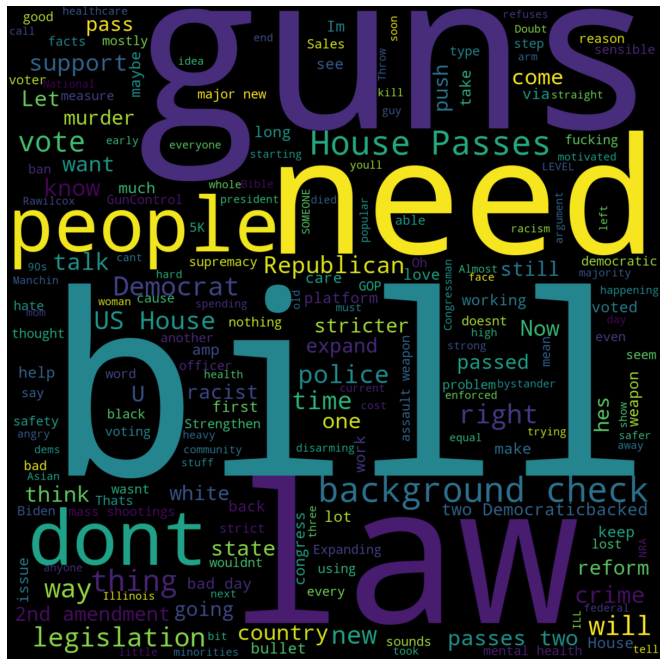

In [24]:
wordcloud = WordCloud(width=1200, 
                      height=1200,
                      background_color="black",
                      stopwords=stop_words).generate(all_text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

I think the main thing I can pull from this word cloud is the fact the gun control, gun laws, and gun incidents will always result back to the peoples use of guns and the fact the someones constitutional "rights" is the most debated thing on twitter.

### Sentiment Analysis

I will now analyze twitter users positive and negative sentiments towards the term "gun control"

I will go through the process of basing tweets on wether fall into one of five categories: very negative, negative, neutral, positive and very positive. I will sample a random tweet, analyze it using the textblob library and then analyze the numerical result.

In [25]:
tweet = df.sample().clean_text.values[0]
print(tweet)

a = TextBlob(tweet)

a.sentiment

Dont refer to gun control Thats the language of gun nuts Use the term gun safety Throw in the word sensible too as in sensible gun safety measures MessagingMatters


Sentiment(polarity=0.0, subjectivity=0.0)

I will add a column on the data frame to contain the polarity, or numerical value of the sentiments.

In [26]:
df['polarity']=''

Then I will use a loop to filter each tweet assigning them polarity to the newly created column in the data frame.

In [27]:
for i, row in df.iterrows():
    a = TextBlob(row.clean_text)
    df.at[i,'polarity'] = a.polarity

Looking at this sample we can see the new column is working effectively 

In [28]:
df[['clean_text','polarity']].sample(5)

clean_text  \
105                                                                                                                                                                                                          House to vote on gun control bills expanding background checks   
64                                                                                                                                                                                                           House Passes Gun Control Bills to Strengthen Background Checks   
110  Theyve been saying this since what 2006 Has ANYONE come for their guns yetWe want better gun control Licensing and education sounds be mandatory the way it is for driving and background checks because hey guns dont kill people by themselves people with intent do   
33                                                          You need to get your facts straight missy Currently there are gun control bills that passed House of Representatives Those gun control bills do take away our guns They take away range of semiautomatic rifles   
6                                                                                                                                                                                                   bee So you are one of the its too soon to talk about gun control people   

    polarity  
105        0  
64         0  
110      0.5  
33       0.1  
6          0

These numerical conditions will now be associated with the values that are readable. -0.2 being the most negative, 0 being neutral and 0.2 being the most positive. Then i will make another column to hold the word based values.

In [29]:
conditions = [
    (df['polarity'] < -0.2), # very negative
    (df['polarity'] < 0) & (df['polarity'] >= -0.2),   # negative
    (df['polarity'] == 0),  # neutral
    (df['polarity'] > 0) & (df['polarity'] <= 0.2),    # positive
    (df['polarity'] > 0.2)  # very positive
    ]

values = [
    'very negative', 
    'negative', 
    'neutral', 
    'positive',
    'very positive'
    ]

df['sentiment'] = np.select(conditions, values)

In [30]:
df.sample(50)[['clean_text','polarity','sentiment']]

clean_text  \
25                                                                                                                                                            0 Doubt they do it for gun control especially since Manchin is the decider on this stuff but its happening in the next month or two   
23                                                                                                                                                         Ew not my mom texting me to tell me my cousin died bc he 8teen and drunk playing with a gun this is why gun control laws are important   
101                                                                         The only thing gun control can do is make people safer I think this legislation is a positive step but still inadequateI believe we need federally mandated instruction liscencing and testing Just like with driving   
0                                                                          A bad day A BAD DAY Who TF does this guy think he is anyway Throw his ass in prison Forever Spoiler alert he wasnt having a bad day hes a fucking psychopath who had access to a deadly weapon We need gun control NOW   
35   brook artig Stanning politicians is wrong Try to say a single negative thing about Senator Sanders and they all jump down your throat Hes a moderate who doesnt have strong gun control on his platform I mostly agree with his platform but hes fallible and way too old to be prez in 2024   
105                                                                                                                                                                                                                                House to vote on gun control bills expanding background checks   
82                                                                                                                                                                                                          voted for the House gun control measure Fairly surprising though welcoming GunControl   
97                                                  That may have been what he meant but the words he said were that there would be no more thoughts and prayers Maybe he misspoke but they seem to do an awful lot of misspeaking when telling people how much crime their gun control will stop   
16                                                                                                                                      I have creative gun control idea too to buy a gun must get three people to sign off with you and if you commit crime the three signatories face 50k fines   
58                                                 You slipped in your Gun control debate sir I thought Democrats were supposed to be on the same page maybe you should speak with Congressmanwomen Torres said 611 mass shootings You say 33 in 2019 2 in 2020 I dont believe any of these snake   
24                                                      2ndAmendment GunControlYou dont need no gun control you know what you need We need some bullet control I think all bullets should cost 5K 5K per bullet You know why Cause if a bullet cost 5K there would be no more innocent bystanders   
39                                                                                                                                Doubt this will make national headlines but its heartbreaking Every day without stricter gun control laws our city is at risk of this happening again and again   
50                                                                         I love thinking about what a center right platform could be Common sense gun control Responsible federal spending Reaffirmed voting rights Money out of politics Gerrymandering reform Reasonable health care mandates   
71                                                                                                                                                                               

I will now assign 5 different colors to the bar chart that match my research topic.

In [31]:
sentiment_colors = ox.plot.get_colors(5,cmap='bone',return_hex=True)

Lastly I will create a bar chart showing the negativ ot positive sentiments of the phrase gun control.

In [32]:
# bar chart
fig = px.bar(df, 
             x='sentiment',
             width=600,
             title='Sentiment analysis for "'+ searchterm + '"',
             color='sentiment',
             category_orders = {'sentiment':['very negative','negative','neutral','positive','very positive']},
             color_discrete_sequence=sentiment_colors, # use the colors selected in previous cell
            )

# fig.update_traces(textinfo='value')
fig.update_traces(marker_line_width=0) # gets rid of horizontal white lines
fig.show()

In the city of chicago the phrase "gun control" has a fairly positive leaning sentiment which it could be concluded that people are in favor of there being stronger gun control laws. The negativ leaning sentiments could mean the tweet is against gun control laws and in favor of 2nd ammendment rights or it could mean that they don't believe gun control works and think that other forces should restrict the use of guns.

I, Ainsleigh, analysed gun control sentiments on the city of Chicago, Illinois. My partner, Stacy, analyzed gun control sentiments for the city of Huston, Texas, inorder for us to compare them further down the line.

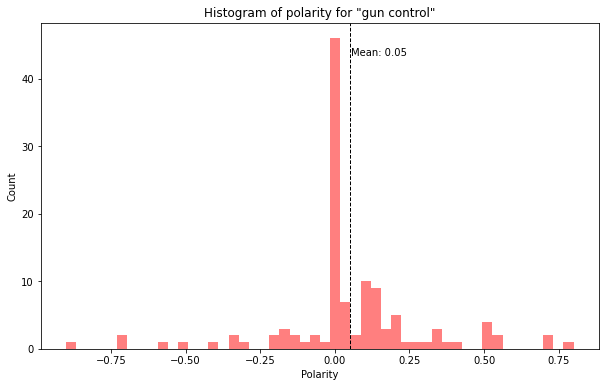

In [33]:
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df.polarity, num_bins, facecolor='red', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity for "' + searchterm + '"')

plt.axvline(df.polarity.mean(), color='k', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(df.polarity.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(df.polarity.mean()))

plt.show();